<a href="https://colab.research.google.com/github/jeonghoya/Machine-Learning-Programming/blob/main/week2/iris_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
from google.colab import files

# 1. 로컬 파일 업로드 창 띄우기
# 이 셀을 실행하면 '파일 선택' 버튼이 나타납니다.
print("CSV 파일을 업로드해주세요.")
uploaded = files.upload()

# 2. 업로드된 파일 처리
if uploaded:
    # 업로드된 파일의 이름을 가져옵니다 (보통 파일 1개만 업로드).
    filename = list(uploaded.keys())[0]
    print(f'\n업로드된 파일: {filename}')

    # uploaded[filename]은 파일의 내용을 바이트 형태로 가지고 있습니다.
    # io.BytesIO를 사용해 이 바이트 데이터를 메모리 상의 파일처럼 만듭니다.
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

    # 3. 데이터프레임 확인
    print("\n파일을 성공적으로 DataFrame으로 변환했습니다.")
    print(df.head())

else:
    print("\n파일이 업로드되지 않았습니다.")

CSV 파일을 업로드해주세요.


Saving iris.csv to iris (1).csv

업로드된 파일: iris (1).csv

파일을 성공적으로 DataFrame으로 변환했습니다.
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# 모델 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings

In [19]:
try:
    # 컬럼명을 지정하여 iris.data 파일 로드
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    df = pd.read_csv('iris.data', header=None, names=column_names)

    # CSV 파일로 저장
    df.to_csv('iris.csv', index=False)
    print("✅ 'iris.data' 파일을 DataFrame으로 로드하고 'iris.csv'로 저장했습니다.")

except FileNotFoundError:
    print("⚠️ 오류: 'iris.data' 파일을 찾을 수 없습니다.")
    print("왼쪽 파일 탐색기 창에 파일을 먼저 업로드해주세요.")

✅ 'iris.data' 파일을 DataFrame으로 로드하고 'iris.csv'로 저장했습니다.


In [20]:
# 데이터 상위 5개 행 출력
print("--- [데이터 샘플] ---")
df.head()


--- [데이터 샘플] ---


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# 데이터 기본 정보 출력
print("\n--- [데이터 정보] ---")
df.info()

# 품종(species)별 데이터 개수 확인
print("\n--- [품종별 데이터 개수] ---")
print(df['species'].value_counts())


--- [데이터 정보] ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

--- [품종별 데이터 개수] ---
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [22]:
# 피처(X)와 타겟(y) 분리
X = df.drop('species', axis=1)
y = df['species']

print("--- [피처 데이터 (X) 샘플] ---")
display(X.head())

print("\n--- [타겟 데이터 (y) 샘플] ---")
display(y.head())

--- [피처 데이터 (X) 샘플] ---


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



--- [타겟 데이터 (y) 샘플] ---


,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [23]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print(f"원본 타겟 데이터: {y.unique()}")
print(f"인코딩된 타겟 데이터: {pd.Series(y_encoded).unique()}")

원본 타겟 데이터: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
인코딩된 타겟 데이터: [0 1 2]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("--- [데이터 분할 결과] ---")
print(f"훈련용 피처(X_train) 크기: {X_train.shape}")
print(f"테스트용 피처(X_test) 크기: {X_test.shape}")
print(f"훈련용 타겟(y_train) 크기: {y_train.shape}")
print(f"테스트용 타겟(y_test) 크기: {y_test.shape}")

--- [데이터 분할 결과] ---
훈련용 피처(X_train) 크기: (120, 4)
테스트용 피처(X_test) 크기: (30, 4)
훈련용 타겟(y_train) 크기: (120,)
테스트용 타겟(y_test) 크기: (30,)


In [25]:
# 1. 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# 2. 모델 훈련
dt_model.fit(X_train, y_train)

# 3. 예측
y_pred_dt = dt_model.predict(X_test)

# 4. 정확도 평가
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"🌳 결정 트리(Decision Tree) 정확도: {acc_dt:.4f}")

🌳 결정 트리(Decision Tree) 정확도: 1.0000


In [26]:
# 1. 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 2. 모델 훈련
rf_model.fit(X_train, y_train)

# 3. 예측
y_pred_rf = rf_model.predict(X_test)

# 4. 정확도 평가
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"🌲 랜덤 포레스트(Random Forest) 정확도: {acc_rf:.4f}")

🌲 랜덤 포레스트(Random Forest) 정확도: 1.0000


In [27]:
# 1. 모델 생성
svm_model = SVC(random_state=42)

# 2. 모델 훈련
svm_model.fit(X_train, y_train)

# 3. 예측
y_pred_svm = svm_model.predict(X_test)

# 4. 정확도 평가
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"🤖 서포트 벡터 머신(SVM) 정확도: {acc_svm:.4f}")

🤖 서포트 벡터 머신(SVM) 정확도: 1.0000


In [28]:
# 1. 모델 생성
lr_model = LogisticRegression(random_state=42)

# 2. 모델 훈련
lr_model.fit(X_train, y_train)

# 3. 예측
y_pred_lr = lr_model.predict(X_test)

# 4. 정확도 평가
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"📊 로지스틱 회귀(Logistic Regression) 정확도: {acc_lr:.4f}")

📊 로지스틱 회귀(Logistic Regression) 정확도: 1.0000


In [29]:
results = {
    'Decision Tree': acc_dt,
    'Random Forest': acc_rf,
    'SVM': acc_svm,
    'Logistic Regression': acc_lr
}

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)

print("--- [최종 모델 성능 비교] ---")
display(results_df)

--- [최종 모델 성능 비교] ---


,Model,Accuracy
0,Decision Tree,1.0
1,Random Forest,1.0
2,SVM,1.0
3,Logistic Regression,1.0



--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


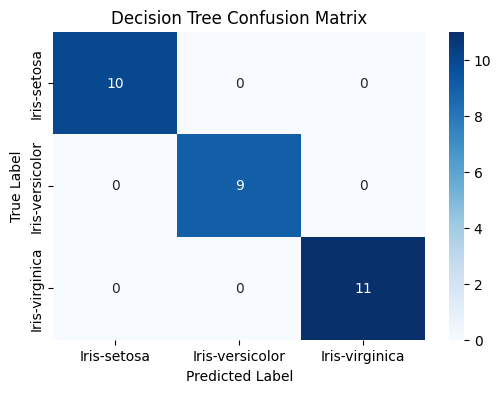

In [30]:
# 5. Confusion Matrix 계산 및 출력
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\n--- Confusion Matrix ---")
print(cm_dt)

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


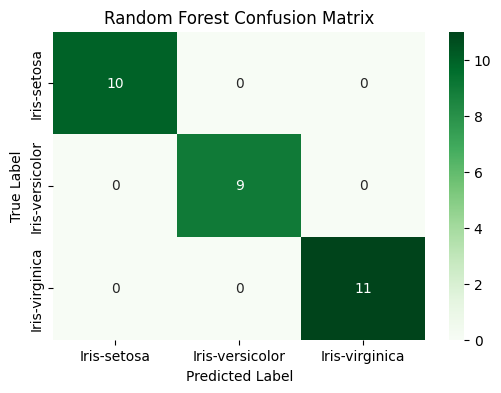

In [31]:
# 5. Confusion Matrix 계산 및 출력
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n--- Confusion Matrix ---")
print(cm_rf)

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


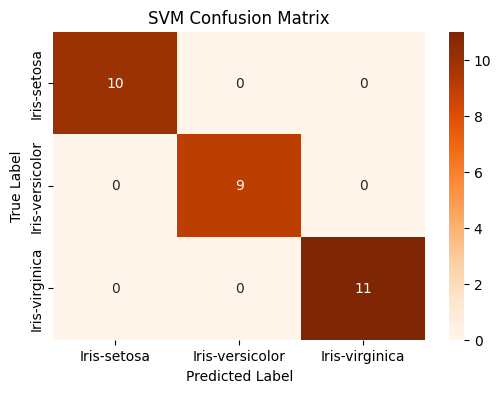

In [32]:
# 5. Confusion Matrix 계산 및 출력
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\n--- Confusion Matrix ---")
print(cm_svm)

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


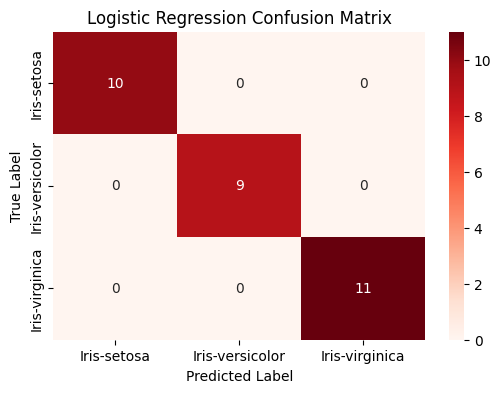

In [33]:
# 5. Confusion Matrix 계산 및 출력
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\n--- Confusion Matrix ---")
print(cm_lr)

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()